---
format:
  html:
    embed-resources: true
    grid:
      sidebar-width: 0px
      body-width: 1100px
      margin-width: 200px
    theme:
      dark: darkly
      light: flatly
    fig-width: 9
    fig-height: 6
jupyter: python3
code-fold: true
code-overflow: wrap
---

# Analyze Criminal Behavioral Patterns

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

## crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |


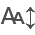

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

## Data Overview

This step is needed so that we know what type of data we are dealing with, and at the same time know the properties of the data.

In [2]:
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0  221412410 2022-06-15 2020-11-12     1700      Pacific   
1  220314085 2022-07-22 2020-05-12     1110    Southwest   
2  222013040 2022-08-06 2020-06-04     1620      Olympic   
3  220614831 2022-08-18 2020-08-17     1200    Hollywood   
4  231207725 2023-02-27 2020-01-27     0635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  Invest Cont   
4            H         NaN  Invest Cont   

                                   LOCATION  
0  13600    MARINA POINT                 DR  
1   2500 S  SYCAMORE                     AV  
2   3300    SAN MARINO                   ST  
3                         1900    TRANSIENT  
4   6200    4TH                          AV

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


checking the datatypes of every column, to know if the columns are of the correct type to deal with.

In [4]:
crimes.describe()

DR_NO                      Date Rptd  \
count  2.479880e+05                         247988   
mean   2.256571e+08  2022-12-14 01:18:45.751246080   
min    2.203000e+03            2022-06-01 00:00:00   
25%    2.210130e+08            2022-09-06 00:00:00   
50%    2.220131e+08            2022-12-13 00:00:00   
75%    2.310058e+08            2023-03-23 00:00:00   
max    2.399165e+08            2023-07-03 00:00:00   
std    5.042345e+06                            NaN   

                            DATE OCC       Vict Age  
count                         247988  247988.000000  
mean   2022-12-01 12:02:48.627514368      29.954764  
min              2020-01-01 00:00:00      -2.000000  
25%              2022-08-27 00:00:00       0.000000  
50%              2022-12-04 00:00:00      31.000000  
75%              2023-03-16 00:00:00      45.000000  
max              2023-07-03 00:00:00      99.000000  
std                              NaN      21.901016

quick check on the basic statistics of the data, though it may not make sense in this dataset.

In [5]:
crimes.shape

(247988, 12)

The dataset contains 247,988 rows and 13 columns, which is quite a lot and makes sense as Los Angeles is a Big City in America and also very populated. 

In [6]:
crimes["DATE OCC"].agg(["min", "max"])

min   2020-01-01
max   2023-07-03
Name: DATE OCC, dtype: datetime64[ns]

This dataset contains record from January 1, 2020 up until July 03, 2023.

In [7]:
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex         32248
Vict Descent     32249
Weapon Desc     167901
Status Desc          0
LOCATION             0
dtype: int64

Having a lot of null values in Victim Sex and Victim descent columns maybe due to data entry issues or reporting issue. Also, Privacy protection can be ruled here, so victim's details might be omitted to protect the privacy of the victims, especially cases involving minors or sensitive cases.
\
As for the weapon description, there are cases that doesn't really involve a victim per se(eg. fraud, cybercrimes and etc). And, if there is no weapon involve in a case, this column will be left empty. 

## Analysis
### Which hour has the highest frequency of crimes?

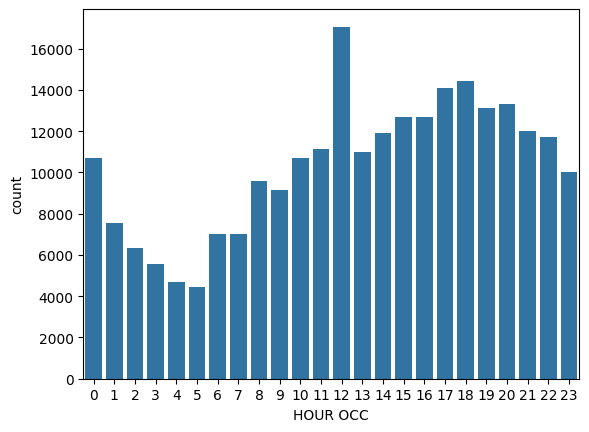

In [8]:
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

The chart shows that at the early morning hours (2am-5am), crime occurences appears to be lower and declining, then starts to climb at 7am. Significant increase can be observe here, with the midday(12noon) appearing to be having the largest volume of crime occurence. The trends appear to remain high after midday, through afternoon and start to gradually declining at night. This pattern indicates that crime rates are influence by human ectivity levels, with fewer incidents at night and early morning, and higher incidents in the day. But, however, this does not necessarily mean fewer crimes occur at night, as some incidents might go unreported due to lower visibility, lack of witnesses, or delayed reporting.

### Which area has the largest frequency of night crimes

In [9]:
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., 4 is not included
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences
peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]

# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


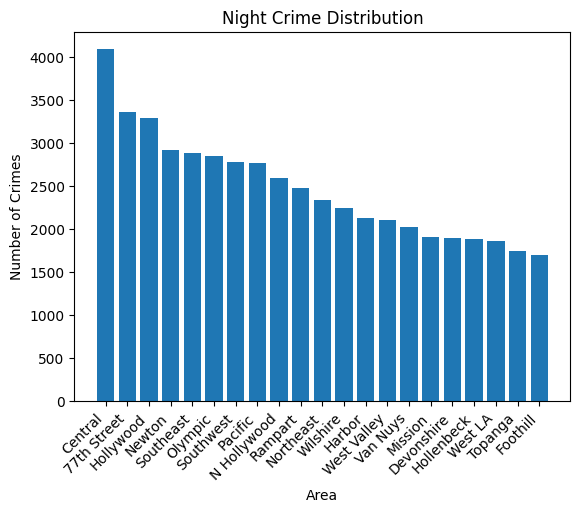

In [10]:
crime_counts = night_time.groupby("AREA NAME").size().sort_values(ascending=False)

plt.bar(crime_counts.index, crime_counts.values, width=0.8)
plt.xlabel("Area") 
plt.ylabel("Number of Crimes")
plt.title("Night Crime Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

The Central area records the highest number of night crimes, having 4091 counts, followed by 77th Street and Hollywood.The downward trend suggests that crime rates are significantly higher in more urbanized or densely populated regions. 

### Identify the number of crimes committed against victims by age group

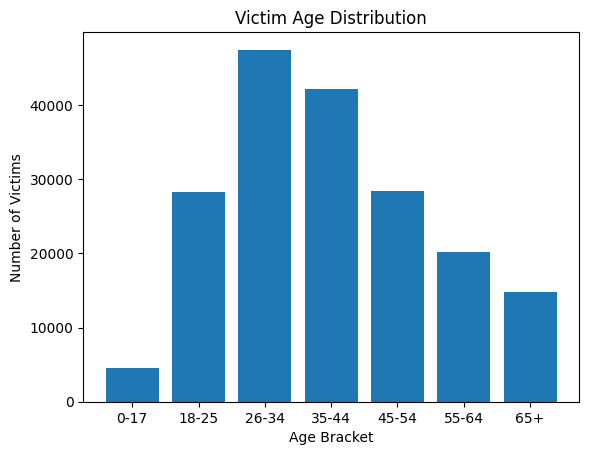

In [11]:
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
# Add a new column
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts(sort=False)

plt.bar(victim_ages.index, victim_ages.values, )
plt.xlabel("Age Bracket")
plt.ylabel("Number of Victims")
plt.title("Victim Age Distribution")
plt.show()

The data indicates that the 26-34 age bracket has the highest amount of victims, then after that is 35-44 age bracket. The number of victims decreases as the age increases or decreases, with the lowest count on 0-17 age bracket, followed by 65+ age bracket. This suggest that middle-aged adults are more affected, while the youngest and the oldest experienced less incident.

### what is the most common victim gender

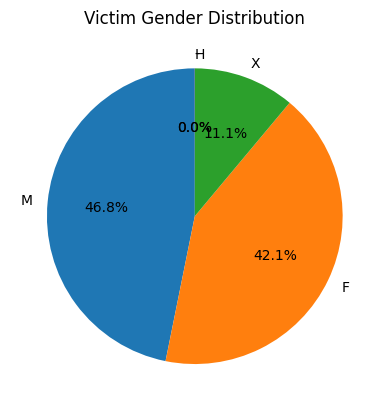

In [12]:
gender_counts = crimes["Vict Sex"].value_counts(sort=False).sort_values(ascending=False)

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Victim Gender Distribution")
plt.show()

### What is the common Victim descent?

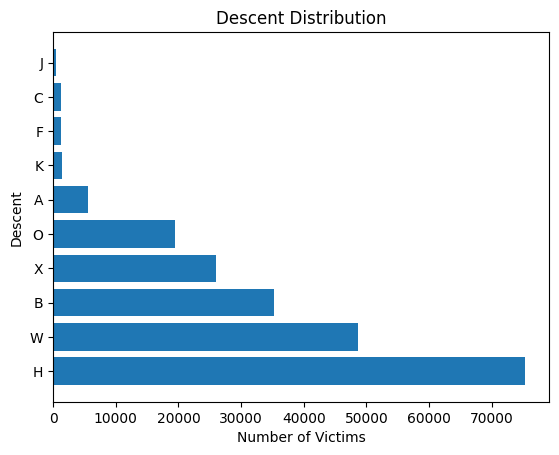

In [13]:
descents = crimes["Vict Descent"].value_counts().nlargest(10)

plt.barh(descents.index, descents.values)
plt.xlabel("Number of Victims")
plt.ylabel("Descent")
plt.title("Descent Distribution")
plt.show()

Hispanic/Latino (H), with over 70,000 victims, making it the most affected group. White (W) populations is the second-largest group, with around 50,000 victims, showing a significant gap. These two are among the largest ethnic groups in USA, especially in LA. So having a higher number of victims from these groups may reflect their larger population size rather than an increased risk of victimization. with over 70,000 victims, making it the most affected group.

Certain ethnic groups, such as Hispanic (H), Black (B), and Other (O), may have a higher victim count due to socioeconomic disparities. Factors like income inequality, neighborhood crime rates, and employment opportunities often correlate with crime exposure.

### What is the most common type of weapon used in crimes?

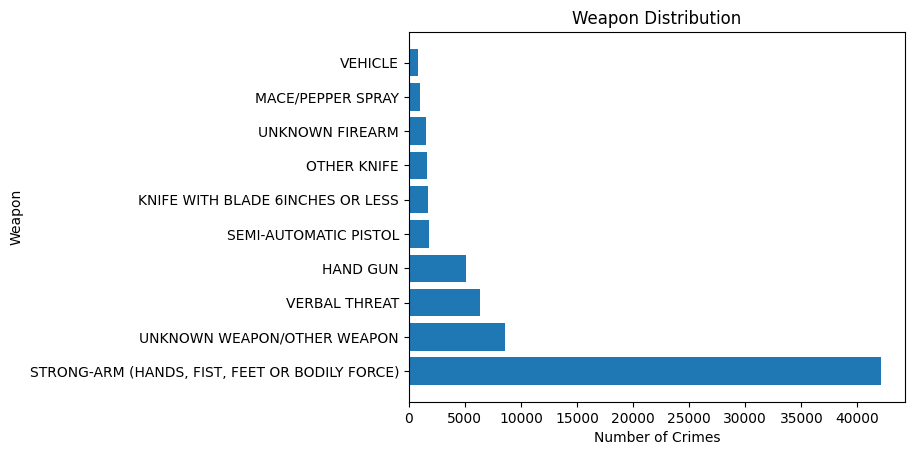

In [14]:
weapon_counts = crimes["Weapon Desc"].value_counts().nlargest(10)

plt.barh(weapon_counts.index, weapon_counts.values)
plt.xlabel("Number of Crimes")
plt.ylabel("Weapon")
plt.title("Weapon Distribution")
plt.show()

Unarmed crimes still are the most common type of weapon used in crimes, totalling about 40,000 counts. This suggest that most crimes that can hurt the victims often involve strong physical force rather than weeapon. Firearms are of course still a concern, but they rank lower than the body assault. Verbal threat, which is a surprise, is listed here, meaning that verbal intimidation is a recognized issue in law enforcement. 